# TP-Partie2 : Analyse d’image

> *Sujet 1 : Region Growing*


*   BILLOD Antoine
*   BURGER Loan








## Code de Region Growing :

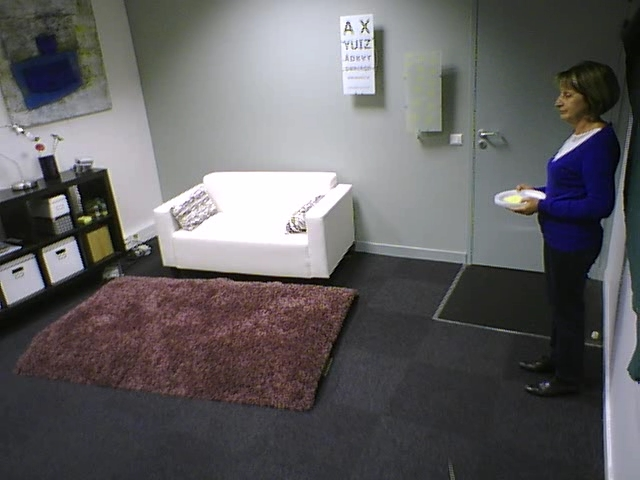

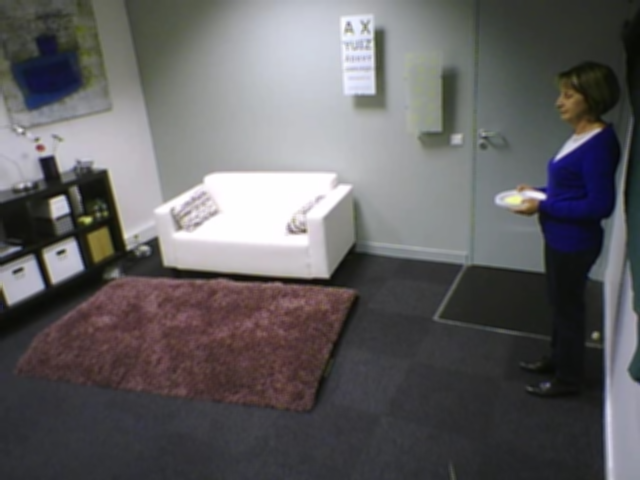

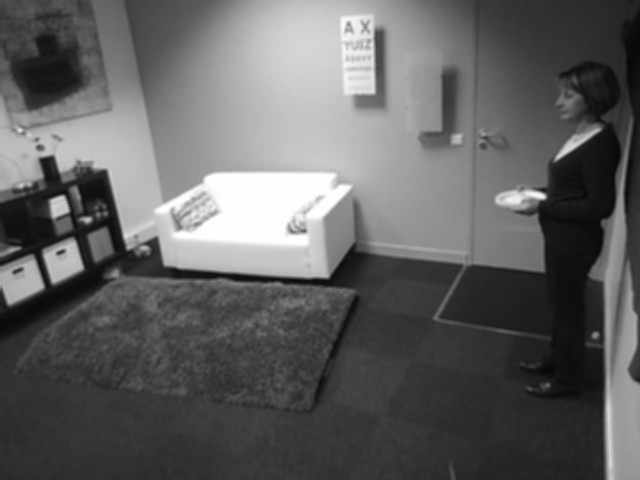

Nombre total de région : 
383


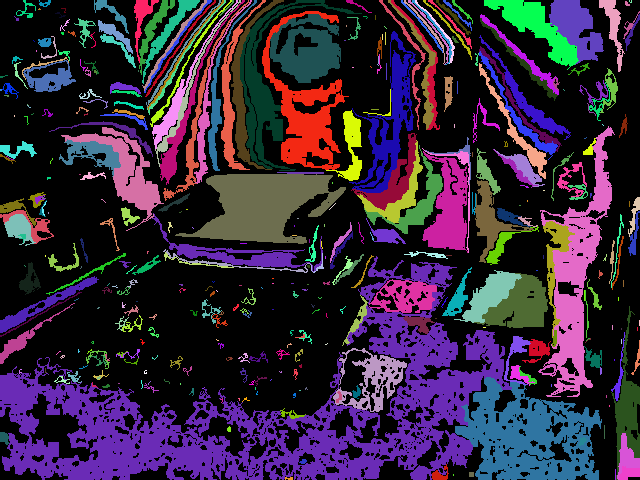

In [5]:
import cv2
import numpy as np
import random
from google.colab.patches import cv2_imshow


# Charger l'image
img = cv2.imread("test1.jpg")
cv2_imshow(img)

# Image flouté
noyau_size = (4, 4)
img = cv2.blur(img, noyau_size)

# Pint l'image
cv2_imshow(img)


# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


# Définir le nombre de germes à générer
num_seeds = 1000

# Générer des germes aléatoires
seeds = np.column_stack((np.random.randint(0, img.shape[0], num_seeds), np.random.randint(0, img.shape[1], num_seeds)))

# Initialiser l'image de segmentation avec des couleurs
segmentation = np.zeros_like(gray)

#optimisation : precalculer largeur et hauteur de notre image pour pas le faire n*n fois.
largeur = gray.shape[0]
longueur = gray.shape[1]

# File des pixels à traités 
pixel = []

# Seuil utilisé pour la construction des régions et la fusion
seuil = 1.4



# Boucle pour mettre les seeds dans la file des pixels à traité
nb_seed = 1
for seed in seeds :
  pixel.append([ nb_seed , seed , gray[seed[0],seed[1]] ])
  nb_seed = nb_seed + 1


while(not(len(pixel) == 0)): # Tant que la file n'est pas vide
  info = pixel.pop(0) # Récupérer le premier triplet
  idx_region = info[0] # Récupération de l'index de la région à laquelle appartient le pixel
  pix_actuel = info[1] # Récupération du pixel à traité
  value_gray = info[2]

  # Récupération des coordonnées du piel à traité
  r= pix_actuel[0]
  c= pix_actuel[1]
  

  for dr in [-1, 0, 1]:
    for dc in [-1, 0, 1]:
      if dr == 0 and dc == 0:
        continue
      rr, cc = r+dr, c+dc #calcul cordonnée ajacente
      if rr < 0 or rr >= largeur: #vérifie si on sort de l'image
        continue
      if cc < 0 or cc >= longueur: #vérifie si on sort de l'image
        continue
      if segmentation[rr, cc] == 0 : #Si le pixel a aucun indice de region.
          if (np.abs(float(gray[rr, cc]) - value_gray) < seuil ):
              segmentation[rr, cc] = idx_region
              pixel.append([ idx_region , (rr,cc) , value_gray ])
                  
      elif segmentation[rr,cc] != 0 and segmentation[rr,cc]!=idx_region : 
          if (np.abs(float(gray[rr, cc]) - value_gray) < seuil ) :
              idxToChange = int(segmentation[rr,cc])
              segmentation = np.where(segmentation == segmentation[rr,cc], idx_region, segmentation)        
              pixel = [[idx_region,i[1],value_gray] if i[0] == idxToChange else i for i in pixel]       
    


# Fonction les couleurs de chaque région
def index_to_color(index_array):

    nbColor = len(np.unique(index_array))
    print("Nombre total de région : ")
    print(nbColor)
    color = np.random.randint(low=0, high=256, size=(nbColor, 3), dtype=np.uint8)
    color[0] = [0,0,0]
    
    # Obtenir les dimensions du tableau d'index
    rows, cols = index_array.shape
    # Initialiser un tableau vide pour les couleurs
    color_array = np.zeros((rows, cols, 3), dtype=np.uint8)

    indexMeet = [0]
    index = 0
    # Remplir le tableau de couleurs en utilisant les valeurs d'index
    for r in range(rows):
        for c in range(cols):
            indexTab = index_array[r, c]
            if(not(indexTab in indexMeet)) :
              indexMeet.append(indexTab)
            index = np.where(indexMeet == indexTab)
            colori = color[index]
            color_array[r, c] = colori

    return color_array

# Fonction qui retourne les frontières
def index_to_frontier(index_array):
    frontier_array = np.zeros_like(index_array)
    rows, cols = index_array.shape
    for r in range(rows):
        for c in range(cols):
            for dr in [-1, 0, 1]:
              for dc in [-1, 0, 1]:
                if dr == 0 and dc == 0:
                  continue
                rr, cc = r+dr, c+dc #calcul cordonnée ajacente
                if rr < 0 or rr >= largeur: #vérifie si on sort de l'image
                  continue
                if cc < 0 or cc >= longueur: #vérifie si on sort de l'image
                  continue
                if index_array[r,c] != index_array[rr,cc] :
                  frontier_array[r,c] = 255

    return frontier_array



segmentation_color = index_to_color(segmentation)
segmentation_frontier = index_to_frontier(segmentation)

# Affichage final
cv2_imshow(segmentation_color)
cv2_imshow(segmentation_frontier)


## Code de Region Growing non parallélisé : 

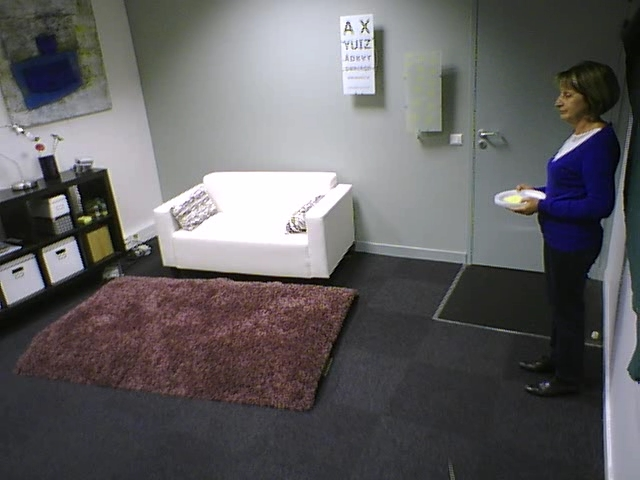

il y a 16254 régions
Region coloré


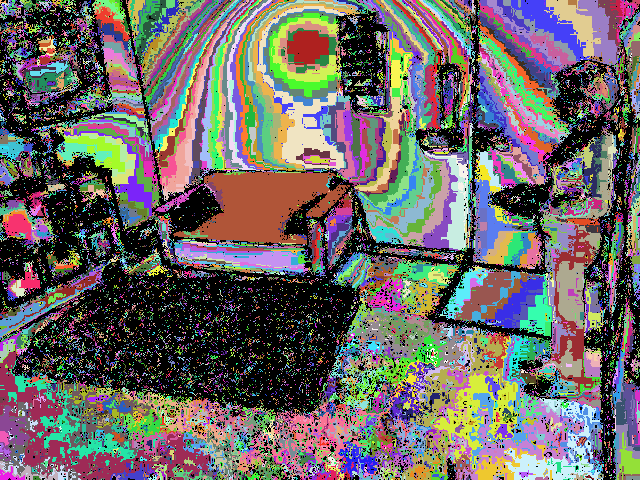

-1

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# Charger l'image
img = cv2.imread("test1.jpg")
cv2_imshow(img)

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Définir le nombre de germes à générer
num_seeds = 50000

# Générer des germes aléatoires
seeds = np.column_stack((np.random.randint(0, img.shape[0], num_seeds), np.random.randint(0, img.shape[1], num_seeds)))

# Initialiser l'image de segmentation avec des couleurs
segmentation_color = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
segmentation = np.zeros_like(gray)


#tableau de regions
regions = []

#optimisation : precalculer largeur et hauteur de notre image pour pas le faire n*n fois.
largeur = gray.shape[0]
longueur = gray.shape[1]
# Boucle pour traiter chaque germe en parallèle
for seed in seeds :

    if(segmentation_color[seed[0],seed[1]].all() != 0) :
        continue
    #while True :
        #seed = (np.random.randint(0, img.shape[0], 1), np.random.randint(0, img.shape[1], 1))
        #if (segmentation_color[seed[0],seed[1]].all() == 0) : 
            #break
    
    # Définir la région en cours de traitement
    region = np.zeros_like(gray)
    region[seed[0], seed[1]] = 255
    # Initialiser la frontière de la région
    frontier = [seed]
    #Init de couleur 
    #color = img[seed[0], seed[1]]
    color = np.column_stack((np.random.randint(30, 255, 1),np.random.randint(30, 255, 1),np.random.randint(30, 255, 1)))
    # Boucle de croissance de la région
    while len(frontier) > 0:
        new_frontier = []
        value_gray = gray[seed[0], seed[1]]
        # Boucle pour chaque pixel de la frontière
        for r, c in frontier:
            #value_gray = float(gray[r, c])
            # Récupérer les pixels adjacents
            for dr in [-1, 0, 1]:
                for dc in [-1, 0, 1]:
                    if dr == 0 and dc == 0:
                        continue
                    rr, cc = r+dr, c+dc #calcul cordonnée ajacente
                    if rr < 0 or rr >= largeur: #vérifie si on sort de l'image
                        continue
                    if cc < 0 or cc >= longueur: #vérifie si on sort de l'image
                        continue
                    # Appliquer les critères de croissance #gray[rr, cc] == gray[r,c]
                    if (np.abs(float(gray[rr, cc]) - value_gray) <2 and region[rr, cc] == 0):
                        region[rr, cc] = 255
                        segmentation_color[rr,cc] = color
                        new_frontier.append((rr, cc))
        frontier = new_frontier
        #cv2_imshow(region) # affichage de la progretion de la graine
    regions.append(region)

# Fusionner la région avec l'image de segmentation
    #for i in range(segmentation.shape[0]):
      #for j in range(segmentation.shape[1]):
        #if region[i,j]==255:
          #segmentation[i,j]=region[i,j]

print("il y a {} régions".format(len(regions)))
# Afficher chaque region independament 
#for idx,region in enumerate(regions) : 
    #print("region numero ", idx)
    #cv2_imshow(region) # affichage de chaque region

# Afficher l'image des region fusionner
#print("Pixel traité (blanc) :")
#cv2_imshow(segmentation) # affichage des régions fusionnées (en blanc)

print("Region coloré")
cv2_imshow(segmentation_color) # affichage des régions fusionnées avec couleurs
cv2.waitKey(0)